Balance            0
QualMiles          0
BonusMiles         0
BonusTrans         0
FlightMiles        0
FlightTrans        0
DaysSinceEnroll    0
dtype: int64
(3999, 7)


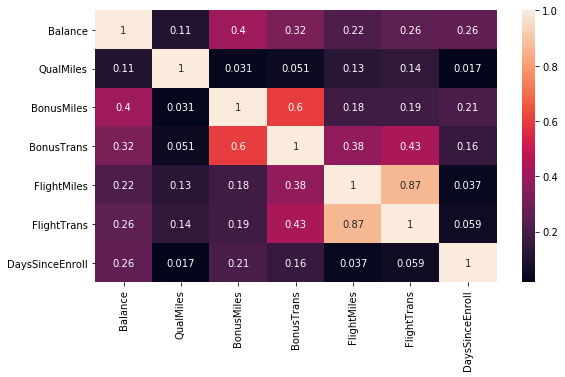

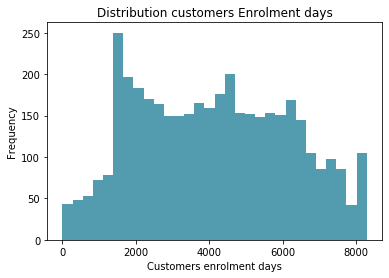

No handles with labels found to put in legend.


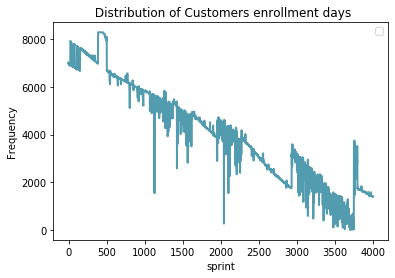

            Balance     QualMiles     BonusMiles  BonusTrans   FlightMiles  \
count  3.999000e+03   3999.000000    3999.000000  3999.00000   3999.000000   
mean   7.360133e+04    144.114529   17144.846212    11.60190    460.055764   
std    1.007757e+05    773.663804   24150.967826     9.60381   1400.209171   
min    0.000000e+00      0.000000       0.000000     0.00000      0.000000   
25%    1.852750e+04      0.000000    1250.000000     3.00000      0.000000   
50%    4.309700e+04      0.000000    7171.000000    12.00000      0.000000   
75%    9.240400e+04      0.000000   23800.500000    17.00000    311.000000   
max    1.704838e+06  11148.000000  263685.000000    86.00000  30817.000000   

       FlightTrans  DaysSinceEnroll  
count  3999.000000       3999.00000  
mean      1.373593       4118.55939  
std       3.793172       2065.13454  
min       0.000000          2.00000  
25%       0.000000       2330.00000  
50%       0.000000       4096.00000  
75%       1.000000       5790.5

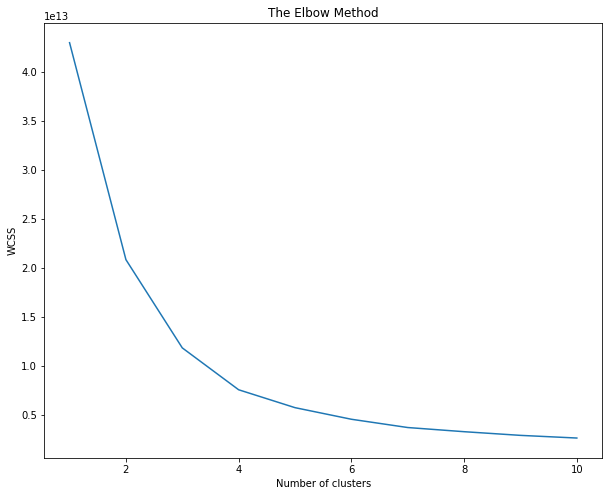

[[2.62386439e+04 9.96626699e+01 8.68629576e+03 8.73980815e+00
  2.57964828e+02 7.99360512e-01 3.73611391e+03]
 [4.19966511e+05 4.49965909e+02 4.98233295e+04 1.99545455e+01
  1.59837500e+03 5.03409091e+00 5.94519318e+03]
 [9.82424227e+04 1.63444656e+02 2.78403893e+04 1.53835878e+01
  6.32483779e+02 1.83587786e+00 4.53122901e+03]
 [9.22162526e+05 5.64736842e+02 5.84920526e+04 2.08947368e+01
  1.60752632e+03 6.26315789e+00 6.64231579e+03]
 [2.08322871e+05 3.08014620e+02 3.55456082e+04 1.82865497e+01
  1.05348538e+03 2.94444444e+00 5.04167544e+03]]
         Balance   QualMiles    BonusMiles  BonusTrans  FlightMiles  \
0   26238.643885   99.662670   8686.295763    8.739808   257.964828   
1  419966.511364  449.965909  49823.329545   19.954545  1598.375000   
2   98242.422710  163.444656  27840.389313   15.383588   632.483779   
3  922162.526316  564.736842  58492.052632   20.894737  1607.526316   
4  208322.871345  308.014620  35545.608187   18.286550  1053.485380   

   FlightTrans  DaysSi

NameError: name 'y_means' is not defined

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('AirlinesCluster.csv')
print(df.isnull().sum())
print(df.shape)

#heatmap
import seaborn as sb
plt.figure(figsize = (9,5))
sb.heatmap(df.corr(), annot=True)
plt.show()

#histogram
fig, ax = plt.subplots()
ax.hist(df['DaysSinceEnroll'], color='#539caf', bins=30)#bins are not a must because the
 # Label the axes and provide a title
ax.set_title("Distribution customers Enrolment days")
ax.set_xlabel("Customers enrolment days")
ax.set_ylabel("Frequency")
plt.show()

#density
fig,  ax = plt.subplots()
ax.plot(df['DaysSinceEnroll'], color='#539caf', lw=2)
ax.set_ylabel("Frequency")
ax.set_xlabel("sprint")
ax.set_title(" Distribution of Customers enrollment days")
ax.legend(loc='best')
plt.show()

pd.set_option('display.max_columns', 10)
print(df.describe())

#use KMeans to cluster data
array = df.values
X = array[:,0:7]  #no target variables so we cannot predict

#WCSS
#within cluster sum of squares - minimising clusters
#justpaste.it/26p9o

plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#put your data for cluster into 5 clusters
kmeans = KMeans(n_clusters=5).fit(X)
centronoids = kmeans.cluster_centers_
print(centronoids)

#we put centronoids in a sample dataframe
cluster = pd.DataFrame(centronoids, columns=['Balance','QualMiles','BonusMiles','BonusTrans','FlightMiles','FlightTrans','DaysSinceEnroll'])

print(cluster)

#pull out data from these clusters
results = zip(X, kmeans.labels_)
sortedR = sorted(results, key = lambda X: X[1])
print(sortedR)

#justpaste.it/5woh8
ymeans = kmeans.fit_predict(X)

#Visualizing the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='cyan',label='Cluster4')


plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

#check out these : justpaste.it/6ov7y

from scipy.stats import ttest_1samp
statistics, pvalue = ttest_1samp(df['FlightTrans'], 56000)
print('p value is :', pvalue)
alpha = 0.05
if pvalue < alpha:
     print('Reject Null Hypothesis')
     print('Accept the alternative')
     print('Alternative Hypothesis(H1)-our sample mean is not equal to 56000')
else:
    print('Accept Null Hypothesis')
    print('Null Hypothesis(H0) - Our sample mean(FlightTrans) is equal to 56000')
    
    



